In [1]:
%pip install uproot3

You should consider upgrading via the '/Users/42pro/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
cd one_muon_3-201/

/Users/42pro/Gray-group/reco_trackML/one_muon_3-201


In [12]:
import uproot3 as ur
import pandas

#Import Data from .root file
trackstates = ur.open("trackstates_fitter.root")

#Create trees from files
tree0 = trackstates[trackstates.keys()[0]]
#tree1 = trackstates[trackstates.keys()[1]]
print(tree0)
#Create pandas dataframe
df0 = tree0.pandas.df()
#df1 = tree1.pandas.df()

print("location?: \t",trackstates)
print("keyes: \t\t", trackstates.keys())
print("Tree: \t\t", tree0)
#print(tree0.keys())
print(df0)

<TTree b'trackstates' at 0x7fd170ae9bb0>
location?: 	 <ROOTDirectory b'/data/reco_trackML/one_muon_3-201/trackstates_fitter.root' at 0x7fd170b63b50>
keyes: 		 [b'trackstates;3', b'trackstates;2']
Tree: 		 <TTree b'trackstates' at 0x7fd170ae9bb0>
                event_nr  multiTraj_nr  subTraj_nr        t_x       t_y  \
entry subentry                                                            
0     0                0             0           0 -18.357302 -3.893846   
      1                0             0           0 -17.560658 -3.718521   
      2                0             0           0 -16.764429 -3.543943   
      3                0             0           0 -15.968007 -3.369994   
      4                0             0           0 -15.170762 -3.197236   
...                  ...           ...         ...        ...       ...   
9999  14            9285             0           0  -4.045948  0.539264   
      15            9285             0           0  -3.236863  0.432427   
    

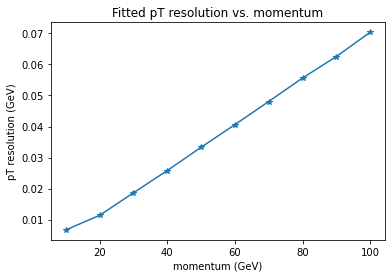

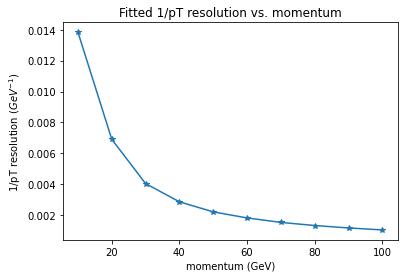

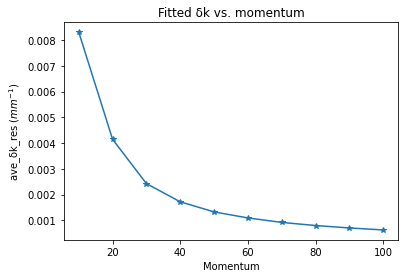

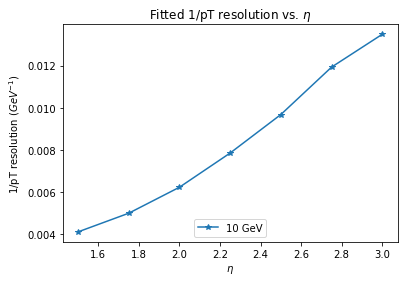

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#eta=3 for pT_smt, pT_smt_inverse
pT_smt = [0.00667970, 0.0113781, 0.0186358, 0.0258108, 0.0333082, 0.0406125, 0.0480633, 0.0556263, 0.0625514, 0.0703859]
pT_smt_inverse = [0.0138394, 0.00690442, 0.00404289, 0.00286144, 0.00221015, 0.00181886, 0.00152867, 0.00132730, 0.00116950, 0.00104250]
pT_smt_inverse_10 = [0.00411678, 0.00500259, 0.00623450, 0.00785705, 0.00968306, 0.0119316, 0.0134890]
pT_smt_10 = []

mom = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure()
plt.plot(mom,pT_smt, marker='*')
plt.title("Fitted pT resolution vs. momentum")
plt.ylabel("pT resolution (GeV)")
plt.xlabel("momentum (GeV)")

plt.figure()
plt.plot(mom,pT_smt_inverse, marker='*')
plt.title("Fitted 1/pT resolution vs. momentum")
plt.ylabel("1/pT resolution ($GeV^{-1}$)")
plt.xlabel("momentum (GeV)")

#Fitted δk_res from pT_smt_inverse
import math
fitted_δk_res = []

i = 0
for i in range(len(pT_smt_inverse)):
    δk_res = pT_smt_inverse[i]*(0.3*2)
    fitted_δk_res.append(δk_res)
    i += 1

plt.figure()
plt.plot(mom,fitted_δk_res, marker='*')
plt.title("Fitted δk vs. momentum")
plt.ylabel("ave_δk_res ($mm^{-1}$)")
plt.xlabel("Momentum")

eta = [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
plt.figure()
plt.plot(eta,pT_smt_inverse_10, marker='*')
plt.title("Fitted 1/pT resolution vs. $\eta$")
plt.ylabel("1/pT resolution ($GeV^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["10 GeV"], loc ="lower center")

In [13]:
import math
tot_L = []
nMeasurements = []

for i in range(10000):
    if (len(df0['t_x'][i]) > 20):
        L = 0
        for j in range (len(df0['t_x'][i])-1):
            dx = df0['t_x'][i][j] - df0['t_x'][i][j+1]
            dy = df0['t_y'][i][j] - df0['t_y'][i][j+1]
            L += math.sqrt( dx**2 + dy**2 )
        tot_L.append(L)
        nMeasurements.append(len(df0['t_x'][i]))
    else :
        continue

In [14]:
#Calculate curvature error due to finite measurement resolution
import math

#for loop for each proj_d
tot_δk_res = []
tot_qopT_res = []
epsilon = 25*(10**(-6))

for i in range(len(tot_L)):
    δk_res = ( epsilon*math.sqrt(720/(nMeasurements[i]+4)) ) / (( tot_L[i]*(10**(-3)) )**2)
    qopT_res = ( δk_res ) / (0.3*2)
    tot_qopT_res.append(qopT_res)
    tot_δk_res.append(δk_res)

print(min(tot_δk_res))
print(max(tot_δk_res))
print()
print(min(tot_qopT_res))
print(max(tot_qopT_res))

0.3966502276485079
0.5047050314096067

0.6610837127475132
0.8411750523493444


In [9]:
ave_δk_res = sum(tot_δk_res)/len(tot_δk_res)
print("The average δk_res is", '%.6f'%ave_δk_res, "mm^-1")

ave_qopT_res = sum(tot_qopT_res)/len(tot_qopT_res)
print("The average qopT_res is", '%.6f'%ave_qopT_res, "GeV^-1")

The average δk_res is 0.400621 mm^-1
The average qopT_res is 0.667701 GeV^-1


In [33]:
#Fitted δk_res from pT_smt_inverse
import math

#pT_smt_inverse_1GeV = []
pT_smt_inverse_10GeV = [0.00411678, 0.00500259, 0.00623450, 0.00785705, 0.00968306, 0.0119316, 0.0134890]
pT_smt_inverse_100GeV = [0.000243007, 0.000305549, 0.000379286, 0.0004880055, 0.000585520, 0.000797083, 0.00100832]

#fitted_δk_res_1GeV = []
fitted_δk_res_10GeV = []
fitted_δk_res_100GeV = []

i = 0
for i in range(len(pT_smt_inverse_10GeV)):
    δk_res_10GeV = pT_smt_inverse_10GeV[i]*(0.3*2)
    δk_res_100GeV = pT_smt_inverse_100GeV[i]*(0.3*2)
    #fitted_δk_res_1GeV.append(δk_res_1GeV)
    fitted_δk_res_10GeV.append(δk_res_10GeV)
    fitted_δk_res_100GeV.append(δk_res_100GeV)
print(fitted_δk_res_10GeV)

[0.0024700679999999997, 0.003001554, 0.0037406999999999996, 0.004714230000000001, 0.005809836, 0.00715896, 0.008093399999999999]


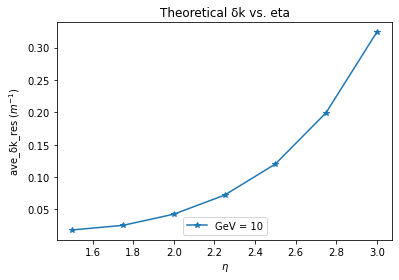

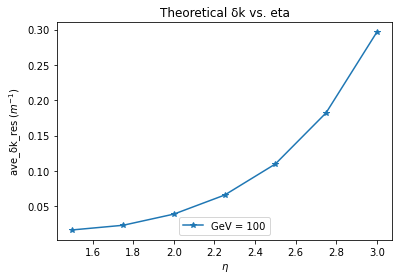

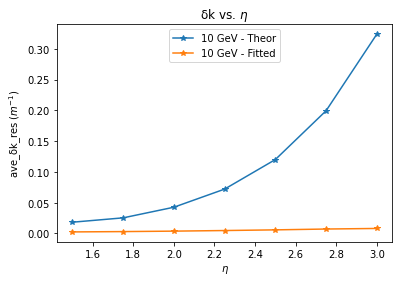

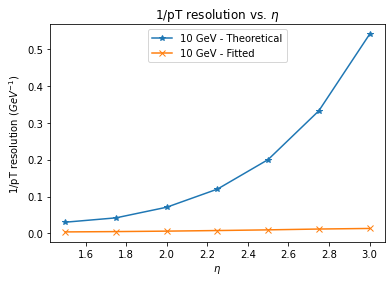

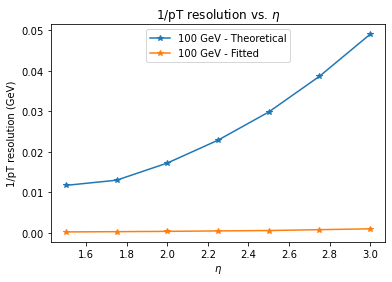

In [29]:
ave_δk_res_10GeV = [0.018249, 0.025334, 0.042594, 0.072037, 0.120043, 0.199338, 0.323773]
ave_δk_res_100GeV = [0.016552, 0.023126, 0.038903, 0.065839, 0.109771, 0.182086, 0.296162]

ave_qopT_res_10GeV = [0.030415, 0.042223, 0.070990, 0.120062, 0.200071, 0.332230, 0.539621]
ave_qopT_res_100GeV = [0.011727, 0.013003, 0.017234, 0.022877, 0.029834, 0.038643, 0.049029]
eta = [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]

plt.figure()
plt.plot(eta,ave_δk_res_10GeV, marker='*')
plt.title("Theoretical δk vs. eta")
plt.ylabel("ave_δk_res ($m^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["GeV = 10"], loc ="lower center")

plt.figure()
plt.plot(eta,ave_δk_res_100GeV, marker='*')
plt.title("Theoretical δk vs. eta")
plt.ylabel("ave_δk_res ($m^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["GeV = 100"], loc ="lower center")

plt.figure()
plt.plot(eta,ave_δk_res_10GeV, marker='*')
plt.plot(eta,fitted_δk_res_10GeV, marker='*')
plt.title("δk vs. $\eta$")
plt.ylabel("ave_δk_res ($m^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["10 GeV - Theor", "10 GeV - Fitted"], loc ="upper center")

plt.figure()
plt.plot(eta,ave_qopT_res_10GeV, marker='*')
plt.plot(eta,pT_smt_inverse_10GeV, marker='x')
plt.title("1/pT resolution vs. $\eta$")
plt.ylabel("1/pT resolution ($GeV^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["10 GeV - Theoretical", "10 GeV - Fitted"], loc ="upper center")

plt.figure()
plt.plot(eta,ave_qopT_res_100GeV, marker='*')
plt.plot(eta,pT_smt_inverse_100GeV, marker='*')
plt.title("1/pT resolution vs. $\eta$")
plt.ylabel("1/pT resolution (GeV)")
plt.xlabel("$\eta$")
plt.legend(["100 GeV - Theoretical", "100 GeV - Fitted"], loc ="upper center")

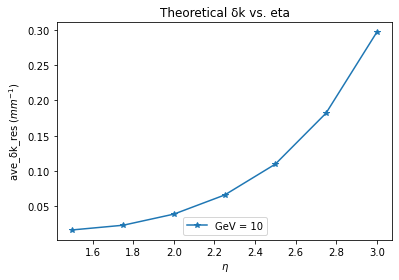

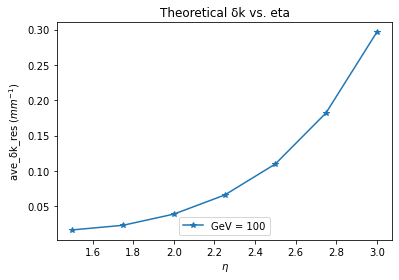

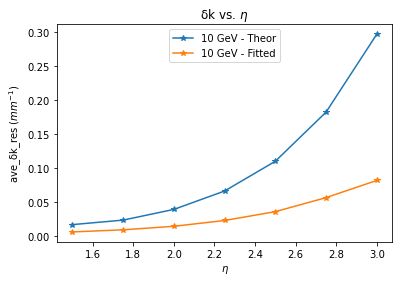

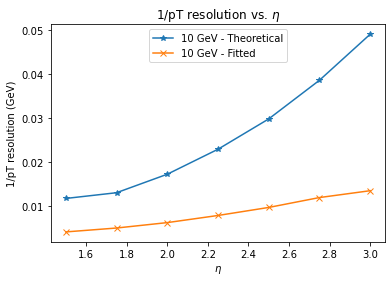

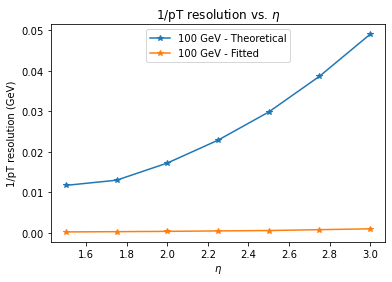

In [36]:
ave_δk_res_10GeV = [0.016554, 0.023178, 0.038906, 0.065959, 0.109706, 0.181917, 0.296460]
ave_δk_res_100GeV = [0.016552, 0.023126, 0.038903, 0.065839, 0.109771, 0.182086, 0.296162]

ave_qopT_res_10GeV = [0.011728, 0.013032, 0.017236, 0.022919, 0.029816, 0.038607, 0.049078]
ave_qopT_res_100GeV = [0.011727, 0.013003, 0.017234, 0.022877, 0.029834, 0.038643, 0.049029]
eta = [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]

plt.figure()
plt.plot(eta,ave_δk_res_10GeV, marker='*')
plt.title("Theoretical δk vs. eta")
plt.ylabel("ave_δk_res ($mm^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["GeV = 10"], loc ="lower center")

plt.figure()
plt.plot(eta,ave_δk_res_100GeV, marker='*')
plt.title("Theoretical δk vs. eta")
plt.ylabel("ave_δk_res ($mm^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["GeV = 100"], loc ="lower center")

plt.figure()
plt.plot(eta,ave_δk_res_10GeV, marker='*')
plt.plot(eta,fitted_δk_res_10GeV, marker='*')
plt.title("δk vs. $\eta$")
plt.ylabel("ave_δk_res ($mm^{-1}$)")
plt.xlabel("$\eta$")
plt.legend(["10 GeV - Theor", "10 GeV - Fitted"], loc ="upper center")

plt.figure()
plt.plot(eta,ave_qopT_res_10GeV, marker='*')
plt.plot(eta,pT_smt_inverse_10GeV, marker='x')
plt.title("1/pT resolution vs. $\eta$")
plt.ylabel("1/pT resolution (GeV)")
plt.xlabel("$\eta$")
plt.legend(["10 GeV - Theoretical", "10 GeV - Fitted"], loc ="upper center")

plt.figure()
plt.plot(eta,ave_qopT_res_100GeV, marker='*')
plt.plot(eta,pT_smt_inverse_100GeV, marker='*')
plt.title("1/pT resolution vs. $\eta$")
plt.ylabel("1/pT resolution (GeV)")
plt.xlabel("$\eta$")
plt.legend(["100 GeV - Theoretical", "100 GeV - Fitted"], loc ="upper center")

In [17]:
#Theoretical pT & pT_inverse

plt.figure()
plt.plot(eta,pT_smt_inverse_10, marker='*')
plt.title("Theoretical 1/pT resolution vs. $\eta$")
plt.ylabel("pT resolution (GeV)")
plt.xlabel("$\eta$")
plt.legend(["1 GeV"], loc ="lower center")

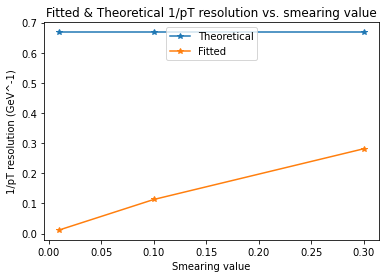

In [17]:
plt.figure()
smearing = [0.01, 0.1, 0.3]
qopT_theo = [0.667701, 0.667701, 0.667701]
qopT_fit = [0.01228048, 0.113282, 0.281379]
plt.plot(smearing,qopT_theo, marker='*')
plt.plot(smearing,qopT_fit, marker='*')
plt.title("Fitted & Theoretical 1/pT resolution vs. smearing value")
plt.ylabel("1/pT resolution (GeV^-1)")
plt.xlabel("Smearing value")
plt.legend(["Theoretical", "Fitted"], loc ="upper center")